# Machine Learning
## Gradient Descent Algorithm Exercise
---

### Steps:

[1] Important necessary dependencies
    - Libraries
    - Modules
    
[2] Obtain data (use one of the following methods):
    
    - Randomly generate
    
    - Webscrape
    
    - API request

[3] Plot the data (scatterplot)

[4] Generate a linear function (Plot the function)

[5] Plot the Scatterplot, the cost funciton (3D) and the Contour Map

[6] Use Gradient Descent to update the parameters of the cost function

[7] Show the optimal function to perdict with highest accuracy the next target variable value.

---

## STEP 0: Import Dependencies
- This includes necessary libraries

In [218]:
# Import necessary dependencies
import matplotlib.pyplot as plt
import math
import random
import plotly
import pandas as pd
import timeit
import numpy as np

## STEP 1: Instantiate/Initialize Global Variables and Constants
Explanation why: *Explanation*
- Example 1
- Example 2
- Example ...
- Example *n*

## STEP 2: Declare Classes, Methods, and Functions

## STEP 3: Obtain the Data
Obtaining the data can be through multiple approaches. Listed below are three common approaches:
- Generate Random Data
- Webscrape Data
- API Request Data
- Manually Search For and Download Data

In [167]:
# Generate Random Data
number_of_elements_in_list = 31
list_random_tuples = []

for _ in range(number_of_elements_in_list):
    rand_x = np.random.randint(1000, 5000)
    variation = np.random.randint(-200, 300)  # Random integer between -200 and 299
    rand_y = 0.5 * rand_x + variation
    list_random_tuples.append((rand_x, rand_y))

In [168]:
# Converting tuples into two separate lists
colors = "blue"
area = 28
x_list = [tuple_random[0] for tuple_random in list_random_tuples]
y_list = [tuple_random[1] for tuple_random in list_random_tuples]

In [169]:
# Verification
print(x_list)
print(y_list)

# Concatenate the string representations of the first 5, the ellipsis, and the last 5 elements
x_list_formatted = f"{x_list[:5]} ... {x_list[-5:]}"
y_list_formatted = f"{y_list[:5]} ... {y_list[-5:]}"

# Remove the square brackets from the middle of the strings
x_list_reformatted = x_list_formatted.replace("] ... [", " ... ")
y_list_reformatted = y_list_formatted.replace("] ... [", " ... ")

print(f"x_list: {x_list_reformatted}\n"
      f"y_list: {y_list_reformatted}")

[2864, 1456, 4249, 4422, 4490, 1815, 1846, 4319, 4240, 4178, 1974, 2908, 1613, 3586, 1111, 3205, 4574, 1793, 2334, 4571, 2910, 3523, 4425, 1899, 4322, 3774, 2994, 1216, 2689, 1468, 4886]
[1699.0, 712.0, 2109.5, 2043.0, 2365.0, 1118.5, 1110.0, 2350.5, 2148.0, 2356.0, 1042.0, 1703.0, 811.5, 1775.0, 546.5, 1509.5, 2209.0, 1061.5, 1019.0, 2557.5, 1452.0, 1619.5, 2223.5, 801.5, 2026.0, 2171.0, 1658.0, 650.0, 1361.5, 961.0, 2676.0]
x_list: [2864, 1456, 4249, 4422, 4490 ... 2994, 1216, 2689, 1468, 4886]
y_list: [1699.0, 712.0, 2109.5, 2043.0, 2365.0 ... 1658.0, 650.0, 1361.5, 961.0, 2676.0]


In [173]:
slope = 1
y_intercept = 2
y_predicted = slope*x_list
y_predicted = []

for x_element in x_list:
    y_element = slope*x_element + y_intercept
    y_predicted.append(y_element)
print(f"x_list: {x_list}\n"
      f"y_predicted: {y_predicted}")


x_list: [2864, 1456, 4249, 4422, 4490, 1815, 1846, 4319, 4240, 4178, 1974, 2908, 1613, 3586, 1111, 3205, 4574, 1793, 2334, 4571, 2910, 3523, 4425, 1899, 4322, 3774, 2994, 1216, 2689, 1468, 4886]
y_predicted: [2866, 1458, 4251, 4424, 4492, 1817, 1848, 4321, 4242, 4180, 1976, 2910, 1615, 3588, 1113, 3207, 4576, 1795, 2336, 4573, 2912, 3525, 4427, 1901, 4324, 3776, 2996, 1218, 2691, 1470, 4888]


In [180]:
y_list
y_predicted

list_error = [(y_predicted_value - y_list_value)**2 for y_predicted_value, y_list_value in zip(y_predicted,y_list)]
print(f"list_error: {list_error}\n"
      f"predicted_y: {y_predicted}\n"
      f"y_list: {y_list}")

list_error: [1361889.0, 556516.0, 4586022.25, 5669161.0, 4524129.0, 487902.25, 544644.0, 3882870.25, 4384836.0, 3326976.0, 872356.0, 1456849.0, 645612.25, 3286969.0, 320922.25, 2881506.25, 5602689.0, 538022.25, 1734489.0, 4062240.25, 2131600.0, 3630930.25, 4855412.25, 1208900.25, 5280804.0, 2576025.0, 1790244.0, 322624.0, 1767570.25, 259081.0, 4892944.0]
predicted_y: [2866, 1458, 4251, 4424, 4492, 1817, 1848, 4321, 4242, 4180, 1976, 2910, 1615, 3588, 1113, 3207, 4576, 1795, 2336, 4573, 2912, 3525, 4427, 1901, 4324, 3776, 2996, 1218, 2691, 1470, 4888]
y_list: [1699.0, 712.0, 2109.5, 2043.0, 2365.0, 1118.5, 1110.0, 2350.5, 2148.0, 2356.0, 1042.0, 1703.0, 811.5, 1775.0, 546.5, 1509.5, 2209.0, 1061.5, 1019.0, 2557.5, 1452.0, 1619.5, 2223.5, 801.5, 2026.0, 2171.0, 1658.0, 650.0, 1361.5, 961.0, 2676.0]


In [182]:
mean_list_error = sum(list_error)/(len(list_error)*2)
mean_list_error

1281334.4516129033

## STEP 0:
#### Import Dependencies (necessary libraries and modules)
#### Declare Global Objects (Variables, Constants)
#### Define Classes, Methods and Functions

In [288]:
## Import Libraries and modules
import matplotlib.pyplot as plt
import math
import random
import plotly
import pandas as pd
import timeit
import numpy as np

## Define Classes, Methods and Functions

## STEP 1:
#### Generate Random Data

In [297]:
# STEP 1: Generate Random Data
list_height = []
height_predicted = []
slope = 1
y_intercept = 20
# Age in years
ndarray_age = np.random.randint(low = 0,high = 100, size = 100)

# Height in centimeters
ndarray_height = 10 + ndarray_age + (-20 * (np.random.random_sample(size = 100)) + 20)

# Trivial Data Set & Target Function data points
list_x_points= [element for element in range(1,101)]
list_y_points= [element for element in range(1,101)]

for element in ndarray_height:
    updated_element = element
    element_rounded = "%.2f" % updated_element
    list_height.append(float(element_rounded))

for element_ndarray_age in ndarray_age:
    element_height_predicted = slope*element_ndarray_age + y_intercept
    height_predicted.append(element_height_predicted)

In [296]:
print(f'list_x_points: {list_x_points}\n' # Verificiation
      f'list_y_points: {list_y_points}') # Verificiation
print(ndarray_age) # Verificiation
print(ndarray_height) # Verification
print(ndarray_height.shape) # Verification
print(list_height) # Verificiation
print(f'ndarray length: {len(ndarray_age)}\n' # Verification
      f'list_height: {len(list_height)}') # Verification
print(f"nd_array_age: {ndarray_age}\n" # Verification
      f"height_predicted: {height_predicted}") # Verification

list_x_points: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100]
list_y_points: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100]
[54 45  6 64 81 66  8 59 28 84 70 17 78 64 22 10 69  1 10 13 80 47 83 34
 24 58 41 24 96 19 84 46 56 88 54  3 31 31 15 63 19 59 73 84 80 19 66  3
 78 78 29 39 36 83 40 52 57 40 67 22 3

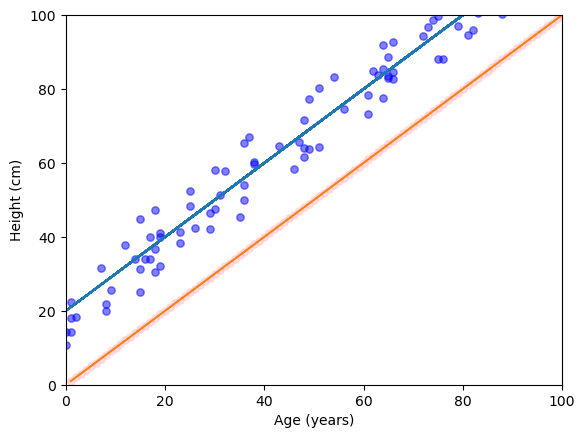

In [293]:
plt.scatter(ndarray_age, list_height, s=area, c=colors, alpha=0.5)
plt.scatter(list_x_points, list_y_points, s=area, c = "pink", alpha=0.5)
plt.plot(ndarray_age,height_predicted)
plt.plot(list_x_points,list_y_points)
plt.xlabel('Age (years)')
plt.ylabel('Height (cm)')
plt.ylim(0,100)
plt.xlim(0,100)
plt.show()

## STEP 2:
#### Gradient Descent

In [307]:
hyperparameter_alpha = 0.00001
w = -4
b = 6
m = len(list_x_points)

for element in list_x_points:
    predicted_y = w*element + b

def for_loop_w_partial_derivative(w, b):
    result = 0
    for index in range(0,m):
        result = result + (w * list_x_points[index] + b - list_y_points[index]) * list_x_points[index]
    result = result / m 
    return result

def for_loop_b_partial_derivative(w, b):
    result = 0
    for index in range(0,m):
        result = result + (w * list_x_points[index] + b - list_y_points[index])
    result = result / m 
    return result

print(type(w))
print(type(hyperparameter_alpha))
print(type(for_loop_w_partial_derivative))
w = w - hyperparameter_alpha * for_loop_w_partial_derivative(w,b)
b = b - hyperparameter_alpha * for_loop_b_partial_derivative(w,b)
print(w, b)

'''
Next step:
For loop, updating w and b by hyperparameter_alpha. Whenever w or b gets closer to 0, keep on updating.
If it gets farther away from 0, make hyperparameter_alpha smaller. (or, invert the parameter to make it negative?)
'''

# J(w,b) = 0.5 * m * new_for_loop

# print(f'w (the slope) = {w}\n'
#       f'and \n'
#       f'b (the y-intercept) = {b}')

<class 'int'>
<class 'float'>
<class 'function'>
-3.833855 6.002381096775


'\nNext step:\nOptimize J(w,b) by minimizing its value, aka = 0.\n'

## STEP 4: Normalize the Data
Normalizing the data improve the performance of the gradient descent algorithm. Why?
- Why?: *Explanation*

## STEP 5: Main Logic


In [ ]:
# Find the linear regression for this data:
## System of equations

### Equation 1: The goal is to find the minimum mean squared error between the predicted values, y_hat, and the target values, y.
f(x) = mx + b

### Equation 2: The goal is to find the values of m and b which minimize the CostFunction
MinSquaredError(m,b) = ?

# Succesful Reference Example (ChatGPT4 Generated)

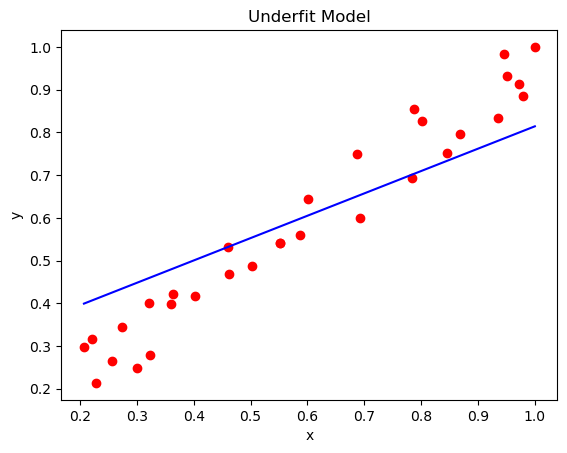

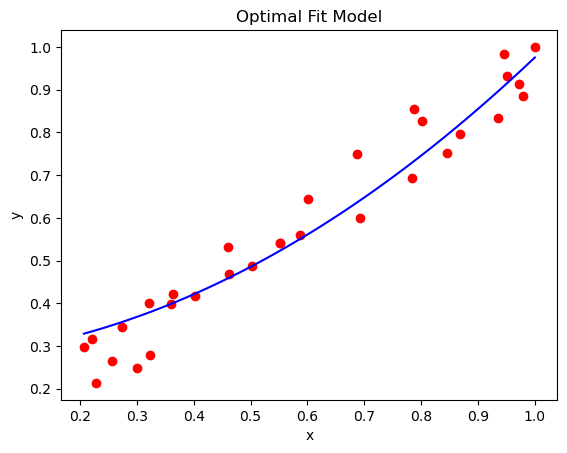

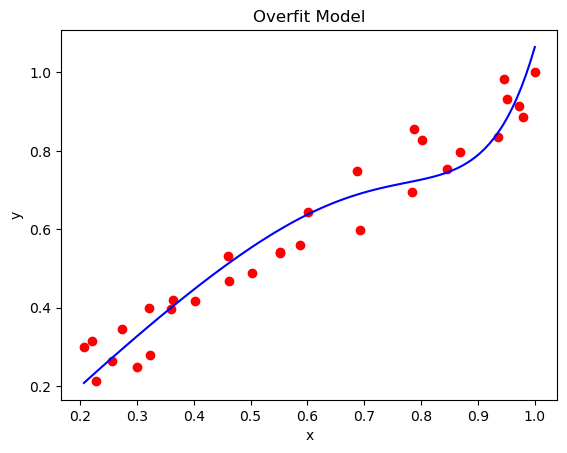

In [124]:
import numpy as np
import matplotlib.pyplot as plt

# Data
x = np.array([3327, 2230, 1449, 4202, 2238, 1322, 4523, 2840, 3353, 1556, 4706, 1948, 2667, 1761, 4092, 4603, 2671, 1068, 4840, 1244, 3880, 4579, 1107, 1738, 4735, 3797, 2907, 2430, 1562, 3814, 1001])
y = np.array([1924.5, 1364.0, 639.5, 2045.0, 1202.0, 887.0, 2143.5, 1440.0, 1538.5, 1028.0, 2346.0, 1071.0, 1392.5, 1080.5, 1933.0, 2393.5, 1387.5, 811.0, 2569.0, 680.0, 2126.0, 2528.5, 548.5, 1022.0, 2275.5, 1782.5, 1657.5, 1253.0, 715.0, 2198.0, 767.5])

# Normalization (for better performance of gradient descent)
x_normalized = x / max(x)
y_normalized = y / max(y)

def polynomial_features(x, degree):
    """ Generate polynomial features """
    return np.array([x**i for i in range(degree + 1)]).T

def gradient_descent(X, y, learning_rate=0.01, n_iterations=1000):
    """ Basic Gradient Descent Algorithm """
    m = len(y)
    theta = np.random.randn(X.shape[1], 1)
    for iteration in range(n_iterations):
        gradients = 2/m * X.T.dot(X.dot(theta) - y)
        theta = theta - learning_rate * gradients
    return theta

# Function to plot the fits
def plot_fit(x, y, theta, degree, title):
    plt.scatter(x, y, color='red')
    x_range = np.linspace(min(x), max(x), 100)
    y_range = polynomial_features(x_range, degree).dot(theta)
    plt.plot(x_range, y_range, color='blue')
    plt.title(title)
    plt.xlabel('x')
    plt.ylabel('y')
    plt.show()

# Underfit Model: Linear (1st degree polynomial)
theta_underfit = gradient_descent(polynomial_features(x_normalized, 1), y_normalized.reshape(-1, 1))
plot_fit(x_normalized, y_normalized, theta_underfit, 1, 'Underfit Model')

# Optimal Fit Model: Quadratic/Cubic (2nd or 3rd degree polynomial)
theta_optimal = gradient_descent(polynomial_features(x_normalized, 2), y_normalized.reshape(-1, 1))
plot_fit(x_normalized, y_normalized, theta_optimal, 2, 'Optimal Fit Model')

# Overfit Model: High Degree Polynomial (e.g., 10th degree)
theta_overfit = gradient_descent(polynomial_features(x_normalized, 10), y_normalized.reshape(-1, 1))
plot_fit(x_normalized, y_normalized, theta_overfit, 10, 'Overfit Model')
